# Introduction

This is only a short intro, if you are completely new the python documentation (and the countless online tutorials) can really help.

The mandatory Hello World:

In [1]:
print("Hello World")  
# Hashtag means comment, this text is not code, Strings in python are marked by "String" or 'String'

Hello World


Variables in python are initialized with variable_name = value; this can also contain operations which are typically evaluated imediatelly, i.e. before the variable is initialized: **strict** evaluation (in contrast to **lazy** evaluation, see the concept of generators, such as `range`).

In [2]:
x = 5.0
y = 4 + 5  # the + operation is done before y is initialized (and stored)
print(x)
print(y + 1)

5.0
10


Each variable has a "type" which is accessed with the built-in `type()` function

If you are new to jupyter: You can use variables etc. across different cells. Once a cell is executed with "Run" (or Shift+Enter) the variables are stored and can be accessed in subsequent cells as well - jupyter just connects to a python REPL, which has a global state. Here we use `x` and `y` from the previous cell

In [3]:
print(type(x))
print(type(y))

<class 'float'>
<class 'int'>


Python is dynamically typed, i.e. the type of a variable can be changed at runtime. See: [Duck-Typing](https://en.wikipedia.org/wiki/Duck_typing): "If it walks like a duck and it quacks like a duck, then it must be a duck"

In [4]:
x = 2.1
print(type(x))
x = 5
print(type(x))

<class 'float'>
<class 'int'>


## Common data structures: Lists, Tuples and Dictionaries

### Lists

In [5]:
a_list = [2, 5.0, "Hello World"]  # this is a list, entries are separated by "," and each entry can have a different type

print("The list: ", a_list)
print("The first element: ", a_list[0])  # get the first element, counting always starts at 0 in python
print("The last element type: ", type(a_list[2]))

The list:  [2, 5.0, 'Hello World']
The first element:  2
The last element type:  <class 'str'>


### Tuples

In [6]:
a_tuple = (2, 5.0, "Hello World")

entry1, entry2, entry3 = a_tuple  # very convenient sometimes, also works with lists: "unpacking"
print(entry1)

2


### Dictionaries

In [7]:
a_dict = {"key":"value", 2:5, "list_as_value":a_list}  # dictionaries consist of key:value pairs (`value` can be pretty much anything, while `key` must be hashable)

value = a_dict[2]  # putting a key in parenthesis returns the value of this key
print("Value of the key 2: ", value)

Value of the key 2:  5


### Be aware of references

Python uses **references**, which are values used to indirectly access stored data

Due to this, different variables might point to the **same** object (i.e. stored data). This can be checked with the `is` statement. On the other hand, `==` checks if the data is the same

For example for lists:

In [55]:
a = [10, 12]
b = a  # creates an additional reference
b[0] = 2  # also modifies a: When using lists, modifying b does NOT create a new reference but modifies the data in place (lists are mutable)
print("a =", a, " b =", b)
print(a is b) # True, since the references are still the same

a = [2, 12]  b = [2, 12]
True


In [57]:
x = 2  # the variable x references the storage where 10 is stored
y = x  # y is now an additional reference to the number 10
print(x is y)  # True, since both references point to the same value

x = 10
print(y)  # still 2, modifying x creates a new refence. Different with respect to lists!
print(x is y)  # False, the reason is that x was modified and points to a different value (i.e. storage) now

True
2
False


As a rule of thumb: For basic data types such as int, float, string,... modifying the value of a variable creates a new reference if needed, for lists etc. data is modified in place, meaning that **all** variables pointing to the same object are changed

To avoid this, we can make an explicit copy

In [6]:
import copy

b = copy.deepcopy(a)  # create a new reference with separate storage
b[0] = 5  # does not modify x now
print("a =", a, "b =", b)
print(a is b)

a = [2, 12] b = [5, 12]
False


#### Indexing
Sidenote: `List[start:end]` returns the elements of the list starting from the index start (included) up to the index end (not included). Leaving start or end empty returns the full range. There are a lot more possibilities for *indexing* and *slicing* iterable data structures. Numpy for example supports [advanced indexing](https://numpy.org/doc/stable/user/basics.indexing.html#advanced-indexing).

In [11]:
a = [0, 1, 2, 3, 4, 5]
print("First 2 elements:", a[:2])
print("All elements starting from index 1:", a[1:])
print("last three elements:", a[-3:])
print("Elements 2 to 4 (not included):", a[2:4])

First 2 elements: [0, 1]
All elements starting from index 1: [1, 2, 3, 4, 5]
last three elements: [3, 4, 5]
Elements 2 to 4 (not included): [2, 3]


Alternative ways to split references

In [12]:
a = [2, 12]
b = list(a)  # creates a new list with separate reference
c = a[:]  # also creates a new reference, but only for the most outer layer, see below
print(a is b)
print(a is c)

False
False


Nesting data structures is possible, for example: lists of lists.

In [13]:
a = [[1, 2], [3, 4]]
print(a[0])
print(a[0][1])  # a[0] is a list, [1] indexes the second element in this list, can also be done with more indices

[1, 2]
2


Be careful with lists of lists

In [13]:
a = [[1, 2], [3, 4]]
b = a[:]  # ***, b has a separate reference now
b[0].append(4)  # add element to the first list in b
print("a is b:", a is b)
print("a[0] is b[0]:", a[0] is b[0])
print("a[0] =", a[0])  # Still, a[0] has also been modified, since *** only creates a new reference for the outmost layer


# deepcopy avoids this problem
a = [[1, 2], [3, 4]]
b = copy.deepcopy(a)  # separate references for all sublists
b[0].append(4)
print("With deepcopy: a[0] is b[0]:", a[0] is b[0])

a is b: False
a[0] is b[0]: True
a[0] = [1, 2, 4]
With deepcopy: a[0] is b[0]: False


### Mutability

- Lists and Dictionaries are mutable, i.e. can be modified at runtime
- Tuples on the other hand are immutable, i.e. cannot be modified at runtime

What's the difference? Modifying elements is convenient but costs ressources, i.e. slows the code down. Thus, as long as the data is not modified, tuples are faster! (You will see in this course that numpy/scipy arrays are the way to go for numerical tasks most of the time)

In [14]:
a = [3, 1, 5]
a.append(4)  # add element
a[2] = 7  # change element
print("a =", a)
b = a + a  # concatenate lists
c = 3 * a  # concatenate a list 3 times
print("a+a =", b)
print("3*a =", c)

b = {2:1, 3:2}
b[5] = 7  # add key and value or
b[5] = 4  # change value of the key 5 if the key already exists
b[7] = b.get(7, 0) + 3  # add 3 to the value of the key 7, the .get(key,default) ensures that no error is thrown
                        # if the key 7 does not yet exist, in that case it returns the default value
print("b =", b)

a = [3, 1, 7, 4]
a+a = [3, 1, 7, 4, 3, 1, 7, 4]
3*a = [3, 1, 7, 4, 3, 1, 7, 4, 3, 1, 7, 4]
b = {2: 1, 3: 2, 5: 4, 7: 3}


However, tuples ar immutable

In [15]:
a = (2, 5)  # with tuple
a[0] = 3  # throws an error, cannot change tuples at runtime

TypeError: 'tuple' object does not support item assignment

## Flow control statements

Python declares certain key words, that are typically used as flow control statements, such as `if`, `elif`, `else`, `for`, `while`, `continue`, `def`, `return`, `yield`, `class` and many more.

### Conditional statements

In [16]:
x = 5 
y = 3
print(y == x)  # this is a statement (other than y = x which assigns x to y) and returns a Bool which is either True or False

# if else checks a statement (or multiple ones) and executes specific clauses depending on the outcome
if y == x:
    print("x = y")
elif y < x:  # if the first statement is False, check the second one
    print("x < y")
else:  # if all previous statements are False
    print("x > y")

statement_2 = True    
if y < x and statement_2:
    print("both statements are true")
# can also remove an else statement if wanted

False
x < y
both statements are true


### Loops

Iterators, Iterables and the `for` and `while` loop:

- Iterables are objects (think of data structures) whose elements can be accessed in an ordered way
- Iterators are objects (think of functions) that perform such an iteration

In [18]:
iterator = range(5)  # iterator that iterates over the integers 0 to 99, general syntax is range(start, stop, stepsize)
a = [1, 4, 7, 9]  # this is an iterable

# we can use iterators/iterables in for loops:
print("With iterator")
for n in iterator:  # do something for each n in iterator
    print(n)
print("With list:")
for element in a:
    print(element)
    
# while loops are executed as long as some statement is true
x = 10
print("A while loop:")
while x < 13:
    print(x)
    x += 1  # be careful, while loops can run forever if the statement does not change

With iterator
0
1
2
3
4
With list:
1
4
7
9
A while loop:
10
11
12


**Important**: In python, indentation is used to delimit blocks of code.

In [19]:
a = [3, 1, 5, 7, 2]
current_element = None  # placeholder
for x in a:
    current_element = x
    if current_element <= 3:  # is done for each element
        print(x)
print("No indent:")
for x in a:
    current_element = x
if current_element <= 3: # first the loop is done, then the if clause
    print(x)

3
1
2
No indent:
2


### Strings
Strings can be formatted in many different ways, see https://docs.python.org/3/library/string.html for some common functions, e.g.

In [20]:
a = "hello world {x:e}"
print(a.format(x=12.3))

hello world 1.230000e+01


## Functions

Separate pieces of code that may be called repeatedly and perform some operation can be encapsulated in a function with the `def` statement. For example

### Defining functions

In [18]:
# the syntax
def function_name(arg_1, arg_2, opt_arg=4):  # arg_1/2 are mandatory arguments opt_arg is optional with default value 4                                                   # *args are optional arguments (there is also **kwargs in principle)
    pass  # does nothing

# more practical examples:
def append_1_to_list(my_list):
    my_list.append(1)
    return my_list  # what the function returns
    
def sum_numbers(x, y, offset=0):
    z = x+y+offset  # do some calculation
    return z  # return the result

### Calling functions

In [19]:
x = [3, 4]
print(append_1_to_list(x)) 
print(append_1_to_list(x)) # calling the function also modifies the list in place, thus calling the function twice adds 1 two times

[3, 4, 1]
[3, 4, 1, 1]


In [20]:
x = 5
y = 8
z = sum_numbers(x, y)  # return values can be assigned to new or exisiting variables
print(z)
print(sum_numbers(x, y, offset=2))

13
15


### Scope of variables
Local vs. Global variables

In [21]:
def func(a):
    local_var = 4  # this is a local variable and exists only INSIDE the function
    return a+local_var
print(func(5))  # this prints as expected
print(local_var)  # gives error, b is only assigned locally INSIDE the function

9


NameError: name 'local_var' is not defined

In [22]:
more_global_var = 5  # can be used inside a function

def func(a):
    a = more_global_var+a  # the left a is a NEW local variable, the original a is NOT modified by this (lists are however)
    return a

a = 4
print(func(a)) 
print(a)

global a  # this is a proper global variable
a = 5 

9
4


A useful concept from functional programming: **Recursion**, i.e. functions that call themselves

In [23]:
def factorial(n):
    assert type(n) is int and n >= 1, "Input must be integer"  # checks if some condition is fulfilled, the String is the error message if not
    if n == 1:
        return 1
    else:
        return n * factorial(n-1)  # here the function at a lower value is called
print(factorial(5))

120


**Note**: it is very easy to write memory-inefficient recursive functions! (but there are [optimizations](https://stackoverflow.com/questions/310974/what-is-tail-call-optimization) to overcome this problem)

### More about function and how you can get help

In [24]:
def my_function(*args):
    """This is the doc string to show what the function does"""
    print(args) 

In [28]:
my_function()  # the doc-string appears, if you put the curser on the corresponding line and press shift-tab 

()


## IO operations

Writing to files

In [27]:
file = open("filename.txt", "w")  #"w" is the mode of operation "w":(over-)write, "a":append, "r":read
file.write("Test\n")  #\n is the newline character
file.close()

# or short:
with open("filename.txt", "w") as f:
    f.write("Test2")

Reading from files

In [28]:
file = open("filename.txt", "r")
data = file.read()  # or .readlines() to get iterator over lines
file.close()

# or short:
with open("filename.txt", 'r') as f:
    data = f.read()
print(data)

Test2


**Note**: the `with` statement indicates that the object returned by `open` implements a contex manager with some [magic methods](https://rszalski.github.io/magicmethods/), which does some setup and cleanup actions for us, here the automatic closing.

# A simple example: Numerical value of $\pi$

Estimate $\pi$ with the __Wallis product__ 
\begin{equation}
\frac{\pi}{2} = \prod_{i=1}^{N} \frac{4i^2}{4i^2-1} + \mathcal{O}\left(\frac{1}{N}\right)
\end{equation}

A simple implementation

In [29]:
N = 10000
estimate = 1.
for i in range(1, N):
    x = 4 * i**2
    estimate *= x / (x-1)
print(2.*estimate)

3.1415141108281714


Countercheck the value with numpy

In [30]:
import numpy as np # import the numpy module, i.e. additional code with name np

print(np.pi) # here we use the value pi stored in numpy

3.141592653589793


Function to implement variable N

In [31]:
def estimate_pi(N=1000):
    estimate = 1.
    for i in range(1, N):
        x = 4 * i**2
        estimate *= np.abs(x / (x-1))
    return 2.*estimate

In [32]:
print(estimate_pi())  # run with default N = 1000

3.1408069608284657


Compute $\pi$ for different N

In [34]:
Ns = 10**np.arange(1, 6)  # np.arange is similar to the built in range(N) from earlier but allows floats
                          # and returns a np.ndarray (somewhat similar to a list) instead of an iterator
estimates = [estimate_pi(N) for N in Ns]
print(estimates)

[3.06003454712689, 3.1337091459408963, 3.1408069608284657, 3.1415141108281714, 3.141584799578707]


Calculate the error

In [35]:
errors = np.abs(np.array(estimates) - np.pi)
print(errors) 

[8.15581065e-02 7.88350765e-03 7.85692761e-04 7.85427616e-05
 7.85401109e-06]


And plot the error scaling

In [36]:
import matplotlib.pyplot as plt  # see first exercise
%matplotlib inline 

The `%matplotlib inline` is an "ipython magic" command that ensures that plots appear inside the jupyter notebook instead of opening a window with the plot (depending on the local configuration).

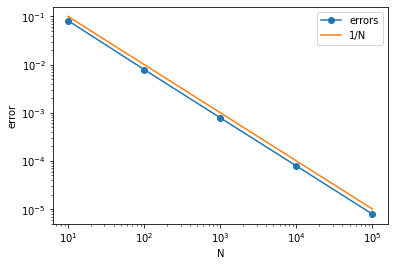

In [38]:
plt.loglog(Ns, errors, '-o', label="errors")
plt.plot(Ns, 1./Ns, label="1/N")
plt.xlabel('N')
plt.ylabel('error')
plt.legend()
plt.show()

### Conclusion
The error scales as $ \mathcal{O}(N^{-1})$ as expected!

## Short intro to classes and object oriented programming

Basic idea:

When programming, one often needs certain types of data and functionality repeatedly. For example, let's say we run a grocery store and want a database for it. For all the products we will need similar data like: barcode, price, list of ingredients etc. We will also need certain functionality for all products, e.g. a function that gets the products barcode and returns the price.

In principle we can store all this information in lists etc. and write corresponding functions but that quickly leads to long and hard to read code (the infamous "spaghetti-code"). Thats why one uses object oriented programming instead. 

Formally, a class is code with three important ingredients:

- Constructors: A function that **creates a new instance** (object) of the class. The input parameters are the initial values of the attributes (barcode,price,... in the example above) of the specific object
- Methods: Functions that can be **called on an instance of the class** (like get the price from the barcode). These functions can use the attributes of the object they are called upon
- classmethod/staticmethod: Functions that are not called on an instance (usually they provide additional functionality for the class)

Wikipedia is actually quite good for the understanding too: https://en.wikipedia.org/wiki/Class_%28computer_programming%29

In [39]:
# example introducing the syntax and main points
class Vector:
    
    # constructor, indicated by the "magic word" __init__ (a class can also have multiple different constructors)
    def __init__(self, data):  # self is the reference to the new object that is created
        self.data = data  # the attribute data (self.data) of the object is initialized and assigned the values given by data

    # these are methods that we can call on an object
    def sum(self):
        return sum(self.data)  # sums up the entries of the objects "data" attribute referenced by self.data
    
    def norm(self):
        return sum([d**2 for d in self.data])
    
    # methods that take additional input arguments are also possible
    def set_data(self, new_data):
        # make sure the dim does not change
        assert len(new_data) == len(self.data)
        self.data = new_data  # updated data of the vector
    
    # these are magic methods that override the + and * operation for two instances of the class Vector (self,other)
    def __add__(self, other):
        assert len(self.data) == len(other.data)
        return Vector([x + y for x, y in zip(self.data, other.data)])
    
    def __mul__(self, other):
        assert len(self.data) == len(other.data)
        return Vector([x * y for x, y in zip(self.data, other.data)])
    
    # define how a Vector is converted to string
    def __str__(self):
        return str(self.data)
    
    @classmethod
    def from_coordinate(cls, point_coords):  # creates the vector from the origin to the point
        data = []
        for x in point_coords:
            data.append(x)
        return cls(data)  # returns a vector
    
    """
    Classmethods: Always have a reference to the class in first place (cls).
    These methods are NOT called on an instance but (generally) use them internally.
    For example: Here, a tuple is given to the method but a vector instance is returned
    
    Staticmethods: Don't have a reference to the class at all
    """

    @staticmethod
    def multiply(v1, v2):  # does the same as __mul__ but gets two iterables as input
        assert(len(v1) == len(v2))
        return [x * y for x, y in zip(v1, v2)]  # returns an array     

Examples on how to use classes

In [40]:
# create a new instance of the Vector class (i.e. a new object)
v = Vector([1, 2, 3]) 
print(v.norm())  # methods can be called on v

14


In [41]:
# magic methods:
w = Vector([4, 5, 4])
z = w * v  # only possible due to the __mul__ method
print(z.data) 

[4, 10, 12]


In [42]:
# use classmethod to create a new instance
v = Vector.from_coordinate((3, 1, 4)) 
print(v)  # prints the string that the magic method __str__ returns

[3, 1, 4]


In [43]:
# use staticmethod to multiply two vectors given as lists
print(Vector.multiply([3, 1, 4], [0, 2, 3]))

[0, 2, 12]


Inheritance: Classes can "inherit" from other classes. This means that constructors and methods from the parent class can be used by the child class. Methods can also be changed (see below) or added 

In [45]:
class Matrix(Vector):  # the class Matrix inherits from the class Vector
    
    def __mul__(self, other):  # overrides the * operation from the Vector, calculates Matrix*Vector
        result = []
        for row in self.data:
            result.append((row * other).sum())
        return Vector(result)
    
    # may add additional methods, constructors etc. here

In [48]:
# creates a matrix instance (using the constructor of the Vector class)
# self.data is now a list containing two Vectors
m = Matrix([Vector([1, 2]), Vector([3, 4])]) 

In [49]:
# multiply the matrix m with a Vector
# this uses the __mul__ function from the Matrix class
prod = m * Vector([0.1, 2])
print(prod)  # uses the __str__ method from the Vector class
print(m.data[0].data, m.data[1].data)  # can you understand what this prints?

[4.1, 8.3]
[1, 2] [3, 4]


Numpy & Scipy
-----
Don't implement matrices by hand, instead use `numpy` & `scipy` ;-) You can find links to the documentation in the "help" menu of the jupyter notebook.
Again, tab and shift-tab are your friends...

In [50]:
import numpy as np
A = np.array([[1, 2], [3, 4]])

In [51]:
b = np.array([0.1, 2])

In [52]:
A.dot(b)

array([4.1, 8.3])

In [53]:
print(np.linalg.norm(A))

np.linalg.eig(A)

5.477225575051661


(array([-0.37228132,  5.37228132]),
 array([[-0.82456484, -0.41597356],
        [ 0.56576746, -0.90937671]]))